# Life Expectancy Regression

## Data Loading

In [1]:
import pandas as pd 

df = pd.read_csv('data/Life Expectancy Data.csv')

Pertama, kita perlu melakukan loading dataset. Kali ini kita menggunakan pd.read_csv karena data yang kita miliki berbentuk CSV.

In [2]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Untuk memastikan data yang kita miliki telah dimuat dengan benar, lakukan pengecekan dengan df.head() untuk menampilkan 5 baris teratas dalam dataframe.

## Analisis distribusi dan noise pada data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Masing-masing variabel yang ada pada dataset memiliki deskripsi sebagai berikut:

| No | Nama Variabel                     | Deskripsi                                                                 |
|----|-----------------------------------|---------------------------------------------------------------------------|
| 1  | Country                           | Nama negara                                                               |
| 2  | Year                              | Tahun pengamatan (2000–2015)                                              |
| 3  | Status                            | Status perkembangan negara (Developed/Developing)                         |
| 4  | Life expectancy                   | Harapan hidup rata-rata saat lahir                                        |
| 5  | Adult Mortality                   | Angka kematian orang dewasa (15–60 tahun) per 1000 penduduk               |
| 6  | infant deaths                     | Jumlah kematian bayi (<1 tahun) per tahun                                 |
| 7  | Alcohol                           | Konsumsi alkohol per kapita (liter)                                       |
| 8  | percentage expenditure            | Persentase pengeluaran kesehatan terhadap GDP                             |
| 9  | Hepatitis B                       | Persentase imunisasi Hepatitis B pada anak-anak                           |
| 10 | Measles                           | Jumlah kasus campak per tahun                                             |
| 11 | BMI                               | Indeks massa tubuh rata-rata penduduk                                     |
| 12 | under-five deaths                 | Jumlah kematian anak di bawah 5 tahun                                     |
| 13 | Polio                             | Persentase imunisasi polio pada anak                                      |
| 14 | Total expenditure                 | Total pengeluaran pemerintah untuk kesehatan (% dari GDP)                 |
| 15 | Diphtheria                        | Persentase imunisasi difteri pada anak                                    |
| 16 | HIV/AIDS                          | Angka kematian akibat HIV/AIDS per 1000 penduduk                          |
| 17 | GDP                               | Produk Domestik Bruto per kapita                                          |
| 18 | Population                        | Jumlah populasi                                                           |
| 19 | thinness  1-19 years              | Persentase kekurusan usia 10–19 tahun                                     |
| 20 | thinness 5-9 years                | Persentase kekurusan usia 5–9 tahun                                       |
| 21 | Income composition of resources   | Indeks komposisi pendapatan (0–1)                                         |
| 22 | Schooling                         | Rata-rata tahun sekolah penduduk usia 25 tahun ke atas                    |


In [4]:
df.shape

(2938, 22)

Dataset memiliki 2938 baris dan 22 kolom

In [5]:
df.describe(include="all")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


df.describe digunakan untuk mengetahui karakteristik statistik terutama pada data numerik, untuk data kategorikal, hanya beberapa statistik yang dapat dihitung. Dengan describe, kita dapat mengetahui informasi seputar: count, unique, top, freq, mean, std, min, 25% (1st quartile), 50% (2nd quartile), dan 75% (3rd quartile).

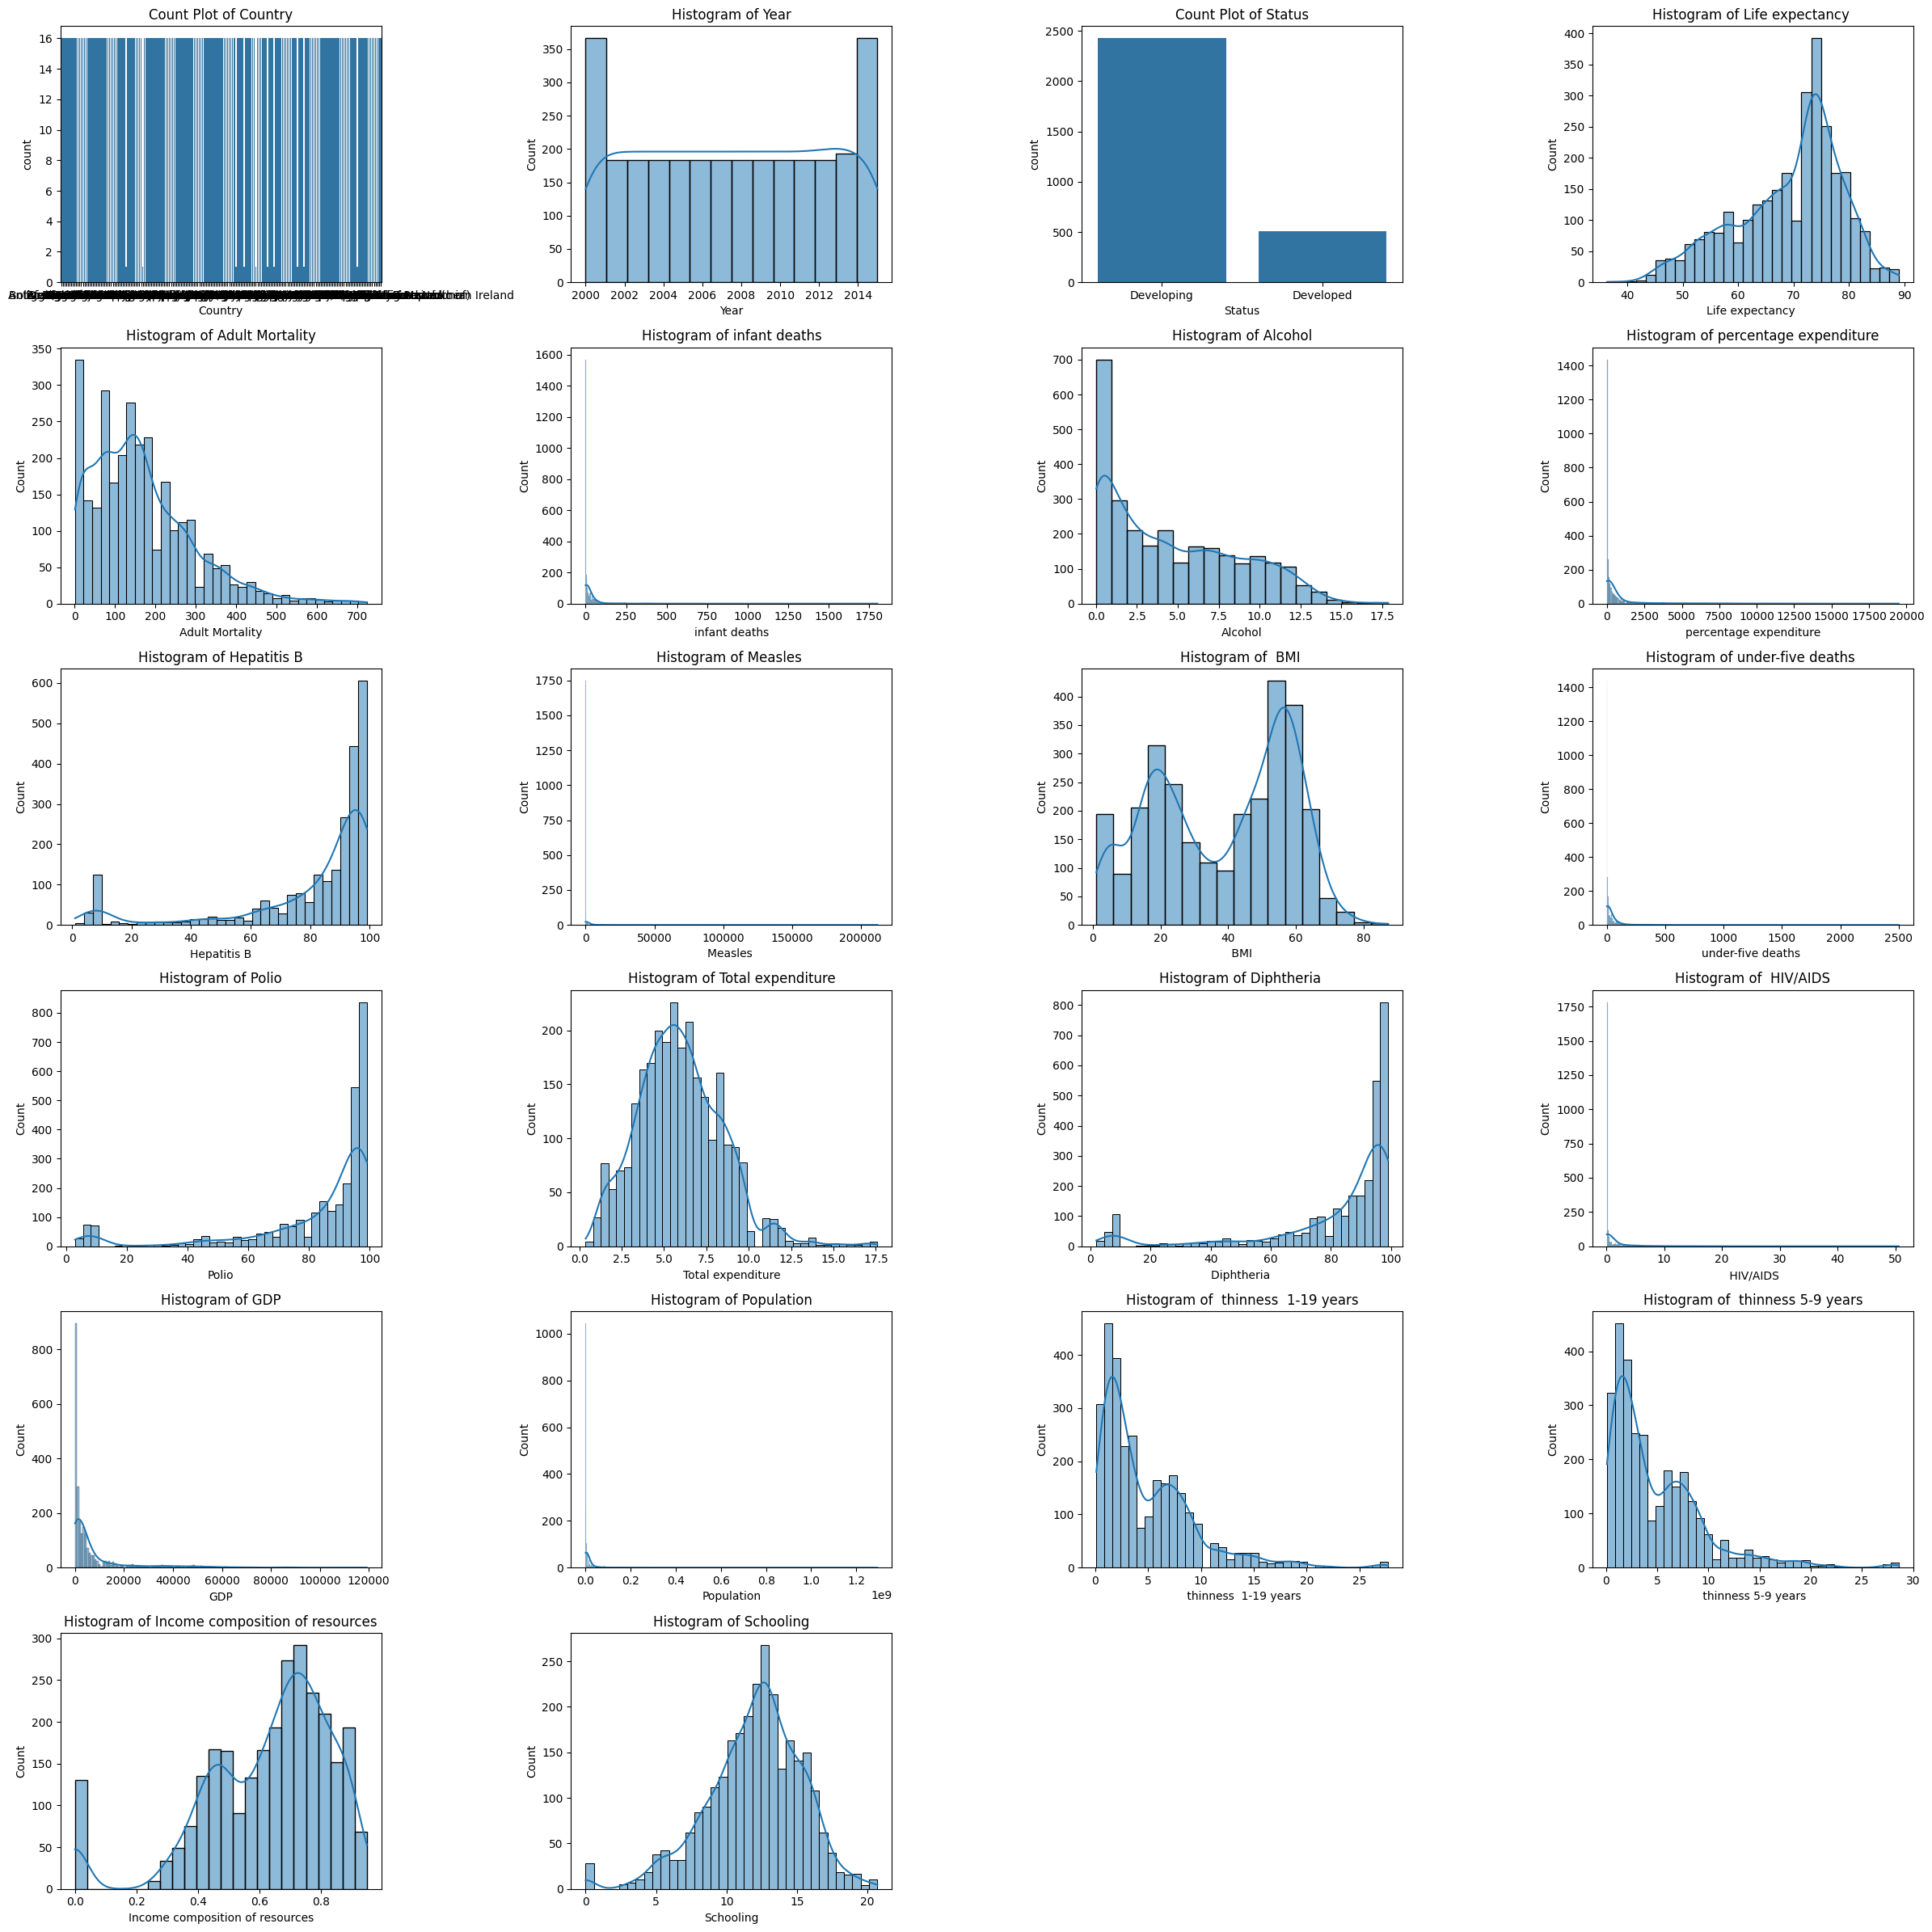

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = 4
n_rows = len(df.columns) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, n_rows*4))

axes = axes.flatten()
for i, feature in enumerate(df.columns):
    if df[feature].dtype == 'object':
        sns.countplot(x=feature, data=df, ax=axes[i])
        axes[i].set_title(f'Count Plot of {feature}')
    else:
        sns.histplot(df[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {feature}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, sebagian besar data memiliki skewed yang sangat besar.

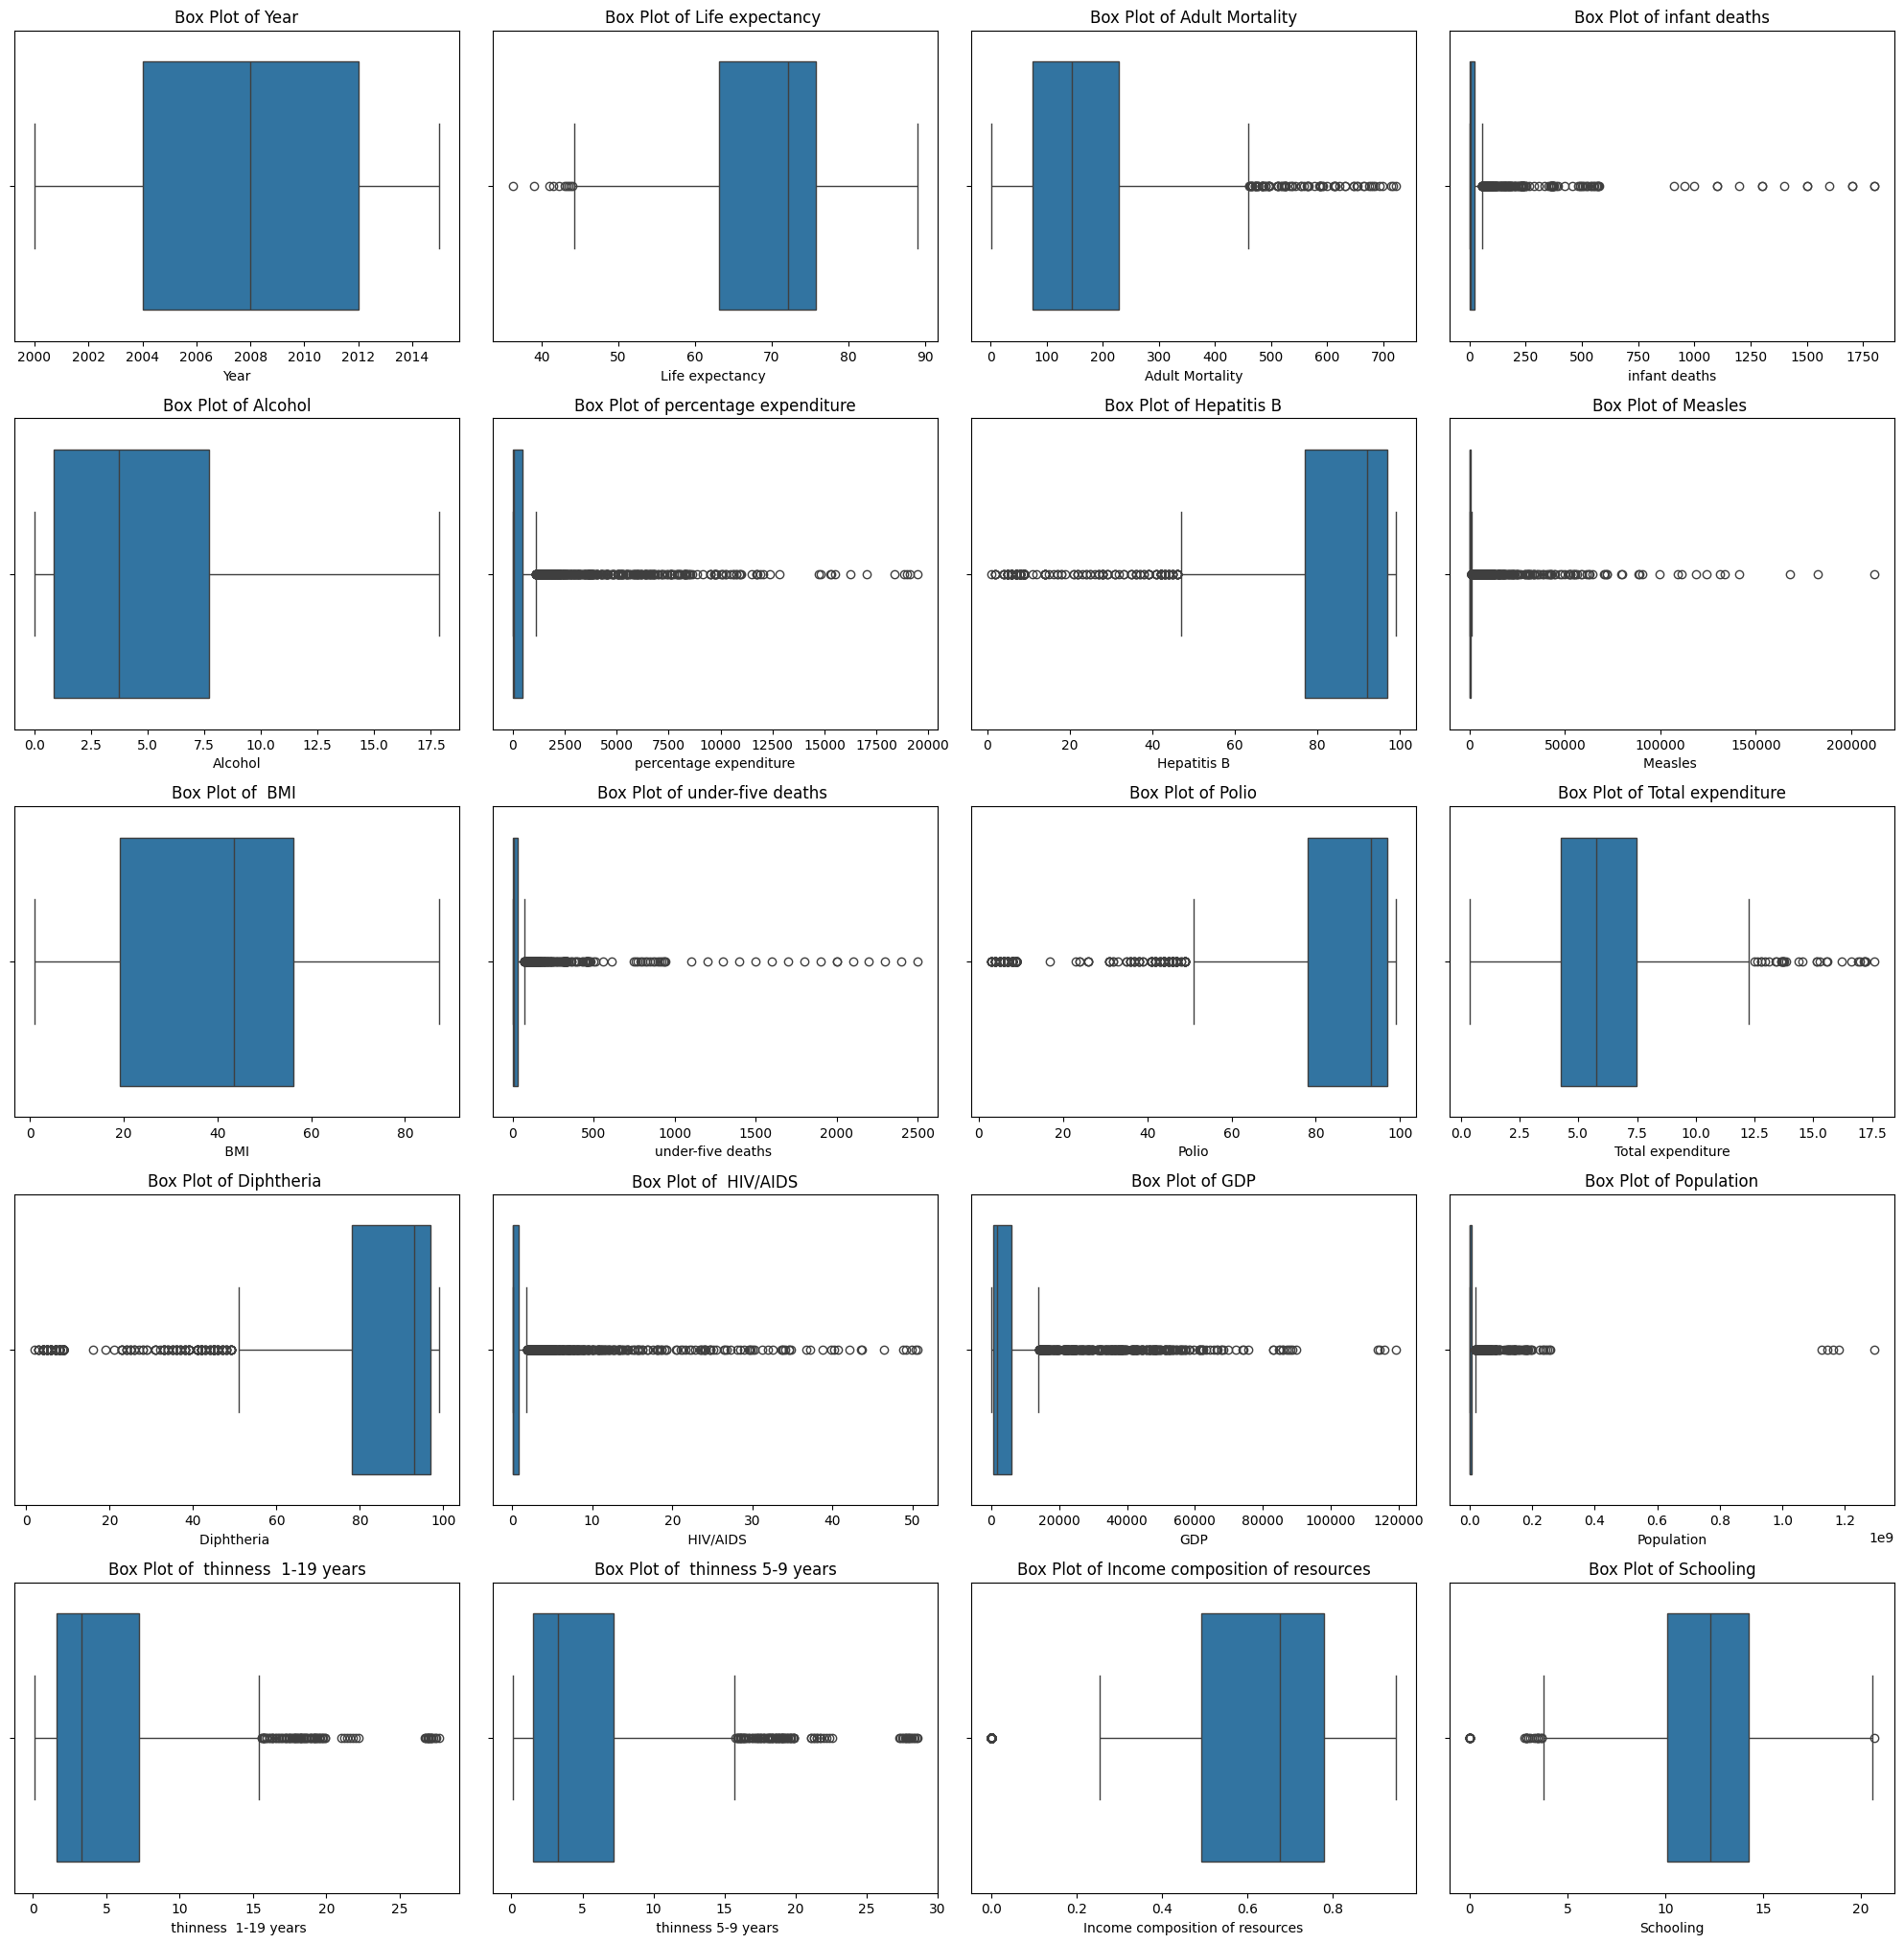

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = 4
n_rows = len(df.columns) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))

num_features = df.select_dtypes(include=['int64', 'float64']).columns
axes = axes.flatten()
for i, feature in enumerate(num_features):
    if df[feature].dtype != 'object':
        sns.boxplot(x=df[feature], ax = axes[i])
        axes[i].set_title(f'Box Plot of {feature}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Hampir seluruh fitur memilki outlier 

## Analisis missing values

In [8]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Fitur yang memiliki missing value memiliki jumlah yang beragam, dari 10 hingga 652 baris.

## Analisis duplicated data

In [9]:
duplicates = df.duplicated().sum()

print("Baris duplikat:")
print(duplicates)


Baris duplikat:
0


Tidak ada data duplikat

## Data Cleaning 

### Cleaning Missing Value

Data kita memiliki skewness yang tinggi, karena itu kita menentukan treshold untuk membagi 2 fitur berdasarkan tingkat skew. Kali ini kita akan menggunakan abs(skewness) < 0.5

In [10]:
for feature in num_features:
    skewness = df[feature].skew()

    print(f'Skewness of {feature}: {skewness}')

Skewness of Year: -0.0064090273593942005
Skewness of Life expectancy : -0.6386047358773552
Skewness of Adult Mortality: 1.1743694876948636
Skewness of infant deaths: 9.786962950426057
Skewness of Alcohol: 0.5895625281160799
Skewness of percentage expenditure: 4.6520513478350605
Skewness of Hepatitis B: -1.9308451037678318
Skewness of Measles : 9.441331947061583
Skewness of  BMI : -0.219311603419775
Skewness of under-five deaths : 9.495064656961773
Skewness of Polio: -2.0980532489729056
Skewness of Total expenditure: 0.6186855520639749
Skewness of Diphtheria : -2.0727529292965605
Skewness of  HIV/AIDS: 5.396112042126371
Skewness of GDP: 3.2066548698696393
Skewness of Population: 15.916235598428203
Skewness of  thinness  1-19 years: 1.7114710881233637
Skewness of  thinness 5-9 years: 1.777423977376571
Skewness of Income composition of resources: -1.143762720185521
Skewness of Schooling: -0.6024365418785147


Missing value pada fitur dengan skewness yang tinggi akan diisi dengan nilai median, karena nilai median lebih robust terhadap skewed dan outlier. Sedangkan data lainnya akan diisi dengan nilai mean [Filling missing values with Mean and Median]

In [11]:
acceptable_skewness = []
non_acceptable_skewness = []

for feature in num_features:
    skewness = df[feature].skew()
    if abs(skewness) < 0.5:
        acceptable_skewness.append(feature)
    else:
        non_acceptable_skewness.append(feature)
        
print("Acceptable skewness features:")
print(acceptable_skewness)
print("Non-acceptable skewness features:")
print(non_acceptable_skewness)

Acceptable skewness features:
['Year', ' BMI ']
Non-acceptable skewness features:
['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [12]:
from sklearn.impute import SimpleImputer
import numpy as np

for feature in acceptable_skewness:
    if df[feature].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='mean')
        df[feature] = imputer.fit_transform(df[[feature]])
        print(f"Missing values in {feature} have been replaced with the mean.")
    else:
        print(f"No missing values in {feature}.")

for feature in non_acceptable_skewness:
    if df[feature].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='median')
        df[feature] = imputer.fit_transform(df[[feature]])
        print(f"Missing values in {feature} have been replaced with the median.")
    else:
        print(f"No missing values in {feature}.")

        

No missing values in Year.
Missing values in  BMI  have been replaced with the mean.
Missing values in Life expectancy  have been replaced with the median.
Missing values in Adult Mortality have been replaced with the median.
No missing values in infant deaths.
Missing values in Alcohol have been replaced with the median.
No missing values in percentage expenditure.
Missing values in Hepatitis B have been replaced with the median.
No missing values in Measles .
No missing values in under-five deaths .
Missing values in Polio have been replaced with the median.
Missing values in Total expenditure have been replaced with the median.
Missing values in Diphtheria  have been replaced with the median.
No missing values in  HIV/AIDS.
Missing values in GDP have been replaced with the median.
Missing values in Population have been replaced with the median.
Missing values in  thinness  1-19 years have been replaced with the median.
Missing values in  thinness 5-9 years have been replaced with th

In [13]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values

Series([], dtype: int64)

Missing value berhasil ditangani

Meskipun pada analisis sebelumnya telah menunjukkan banyaknya data outlier, kita tidak melakukan pembersihan outlier karena tujuan kita adalah menganalisis hubungan fitur dengan Life Expectancy. Dan data yang kita miliki menggambarkan kondisi aktual [When should I remove an outlier from my dataset?].

### Drop fitur Country

Karena kita ingin menganalisis Life Expectancy secara global, maka data spesifik country tidak diperlukan, cukup status (developing/developed) dari country tersebut.

In [15]:
df.drop(columns='Country', inplace=True)

## Transformation

### Log transformation
Seperti yang bisa dilihat pada grafik histogram sebelumnya, terdapat beberapa fitur yang memiliki skewness sangat tinggi. Karena itu kita menetapkan ambang batas abs(1) untuk dilakukan log transformation. Mengapa menggunakan log transformation? [Log Transformation: Purpose and Interpretation] dengan log transformation, kita bisa mengubah data kita menjadi "normal".

In [16]:
log_features = []

for feature in num_features:
    if abs(df[feature].skew()) > 1:
        df[feature] = np.log1p(df[feature])
        log_features.append(feature)

print("Log-transformed features:")
print(log_features)

Log-transformed features:
['Adult Mortality', 'infant deaths', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources']


In [17]:
for feature in log_features:
    df[feature] = np.log1p(df[feature])
    print(f"Log-transformed {feature}.")

Log-transformed Adult Mortality.
Log-transformed infant deaths.
Log-transformed percentage expenditure.
Log-transformed Hepatitis B.
Log-transformed Measles .
Log-transformed under-five deaths .
Log-transformed Polio.
Log-transformed Diphtheria .
Log-transformed  HIV/AIDS.
Log-transformed GDP.
Log-transformed Population.
Log-transformed  thinness  1-19 years.
Log-transformed  thinness 5-9 years.
Log-transformed Income composition of resources.


Fitur dengan skewness tinggi, telah dilakukan log transformation.

### Standardization

Data kita memiliki banyak sekali outlier, karena itu kita menggunakan standardization [Normalization vs Standardization]. 

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for feature in num_features:
    df[feature] = scaler.fit_transform(df[[feature]])
    print(f"Standardized {feature}.")

Standardized Year.
Standardized Life expectancy .
Standardized Adult Mortality.
Standardized infant deaths.
Standardized Alcohol.
Standardized percentage expenditure.
Standardized Hepatitis B.
Standardized Measles .
Standardized  BMI .
Standardized under-five deaths .
Standardized Polio.
Standardized Total expenditure.
Standardized Diphtheria .
Standardized  HIV/AIDS.
Standardized GDP.
Standardized Population.
Standardized  thinness  1-19 years.
Standardized  thinness 5-9 years.
Standardized Income composition of resources.
Standardized Schooling.


Setelah melakukan berbagai tahapan transformasi, lakukan pengecekan pada dataframe kita.

In [19]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621762,Developing,-0.445408,0.733383,1.276514,-1.156989,0.375155,-0.139398,1.078353,-0.964715,...,-4.196597,0.931485,-0.117950,-0.611962,-0.525032,1.237852,1.621390,1.595385,-0.534228,-0.585017
1,1.404986,Developing,-0.981827,0.754370,1.286041,-1.156989,0.382536,-0.204904,0.953943,-0.989810,...,-0.283485,0.939818,-0.182207,-0.611962,-0.496032,-0.413702,1.635420,1.604486,-0.548070,-0.615649
2,1.188210,Developing,-0.981827,0.746584,1.295224,-1.156989,0.381551,-0.160831,0.932967,-1.014905,...,-0.191220,0.918987,-0.138974,-0.611962,-0.477447,1.218882,1.644617,1.613465,-0.575899,-0.646281
3,0.971434,Developing,-1.023899,0.756943,1.308404,-1.156989,0.397057,-0.097669,1.193976,-1.040000,...,-0.085269,1.081463,-0.077017,-0.611962,-0.442006,0.509486,1.653690,1.626709,-0.608615,-0.676912
4,0.754658,Developing,-1.055453,0.764598,1.316822,-1.156989,-0.309374,-0.077350,1.203647,-1.060076,...,-0.065193,0.810670,-0.057085,-0.611962,-2.131376,0.433024,1.667078,1.635394,-0.651077,-0.768808


### Label Encoding
Kita perlu melakukan label encoding karena model tidak dapat memahami data kategorikal, kare itu kita perlu mentransformasikannya menjadi angka terlebih dahulu [Label Encoding in Python]. 

In [20]:
from sklearn.preprocessing import LabelEncoder
df['Status'] = LabelEncoder().fit_transform(df['Status'])  # Developed = 0, Developing = 1


## Exploratory Data Analysis
Sebelum masuk pada tahap modeling, kita akan melakukan proses Exploratory Data Analysis terlebih dahulu untuk lebih memahami dataset yang dimiliki.

### Persebaran Data

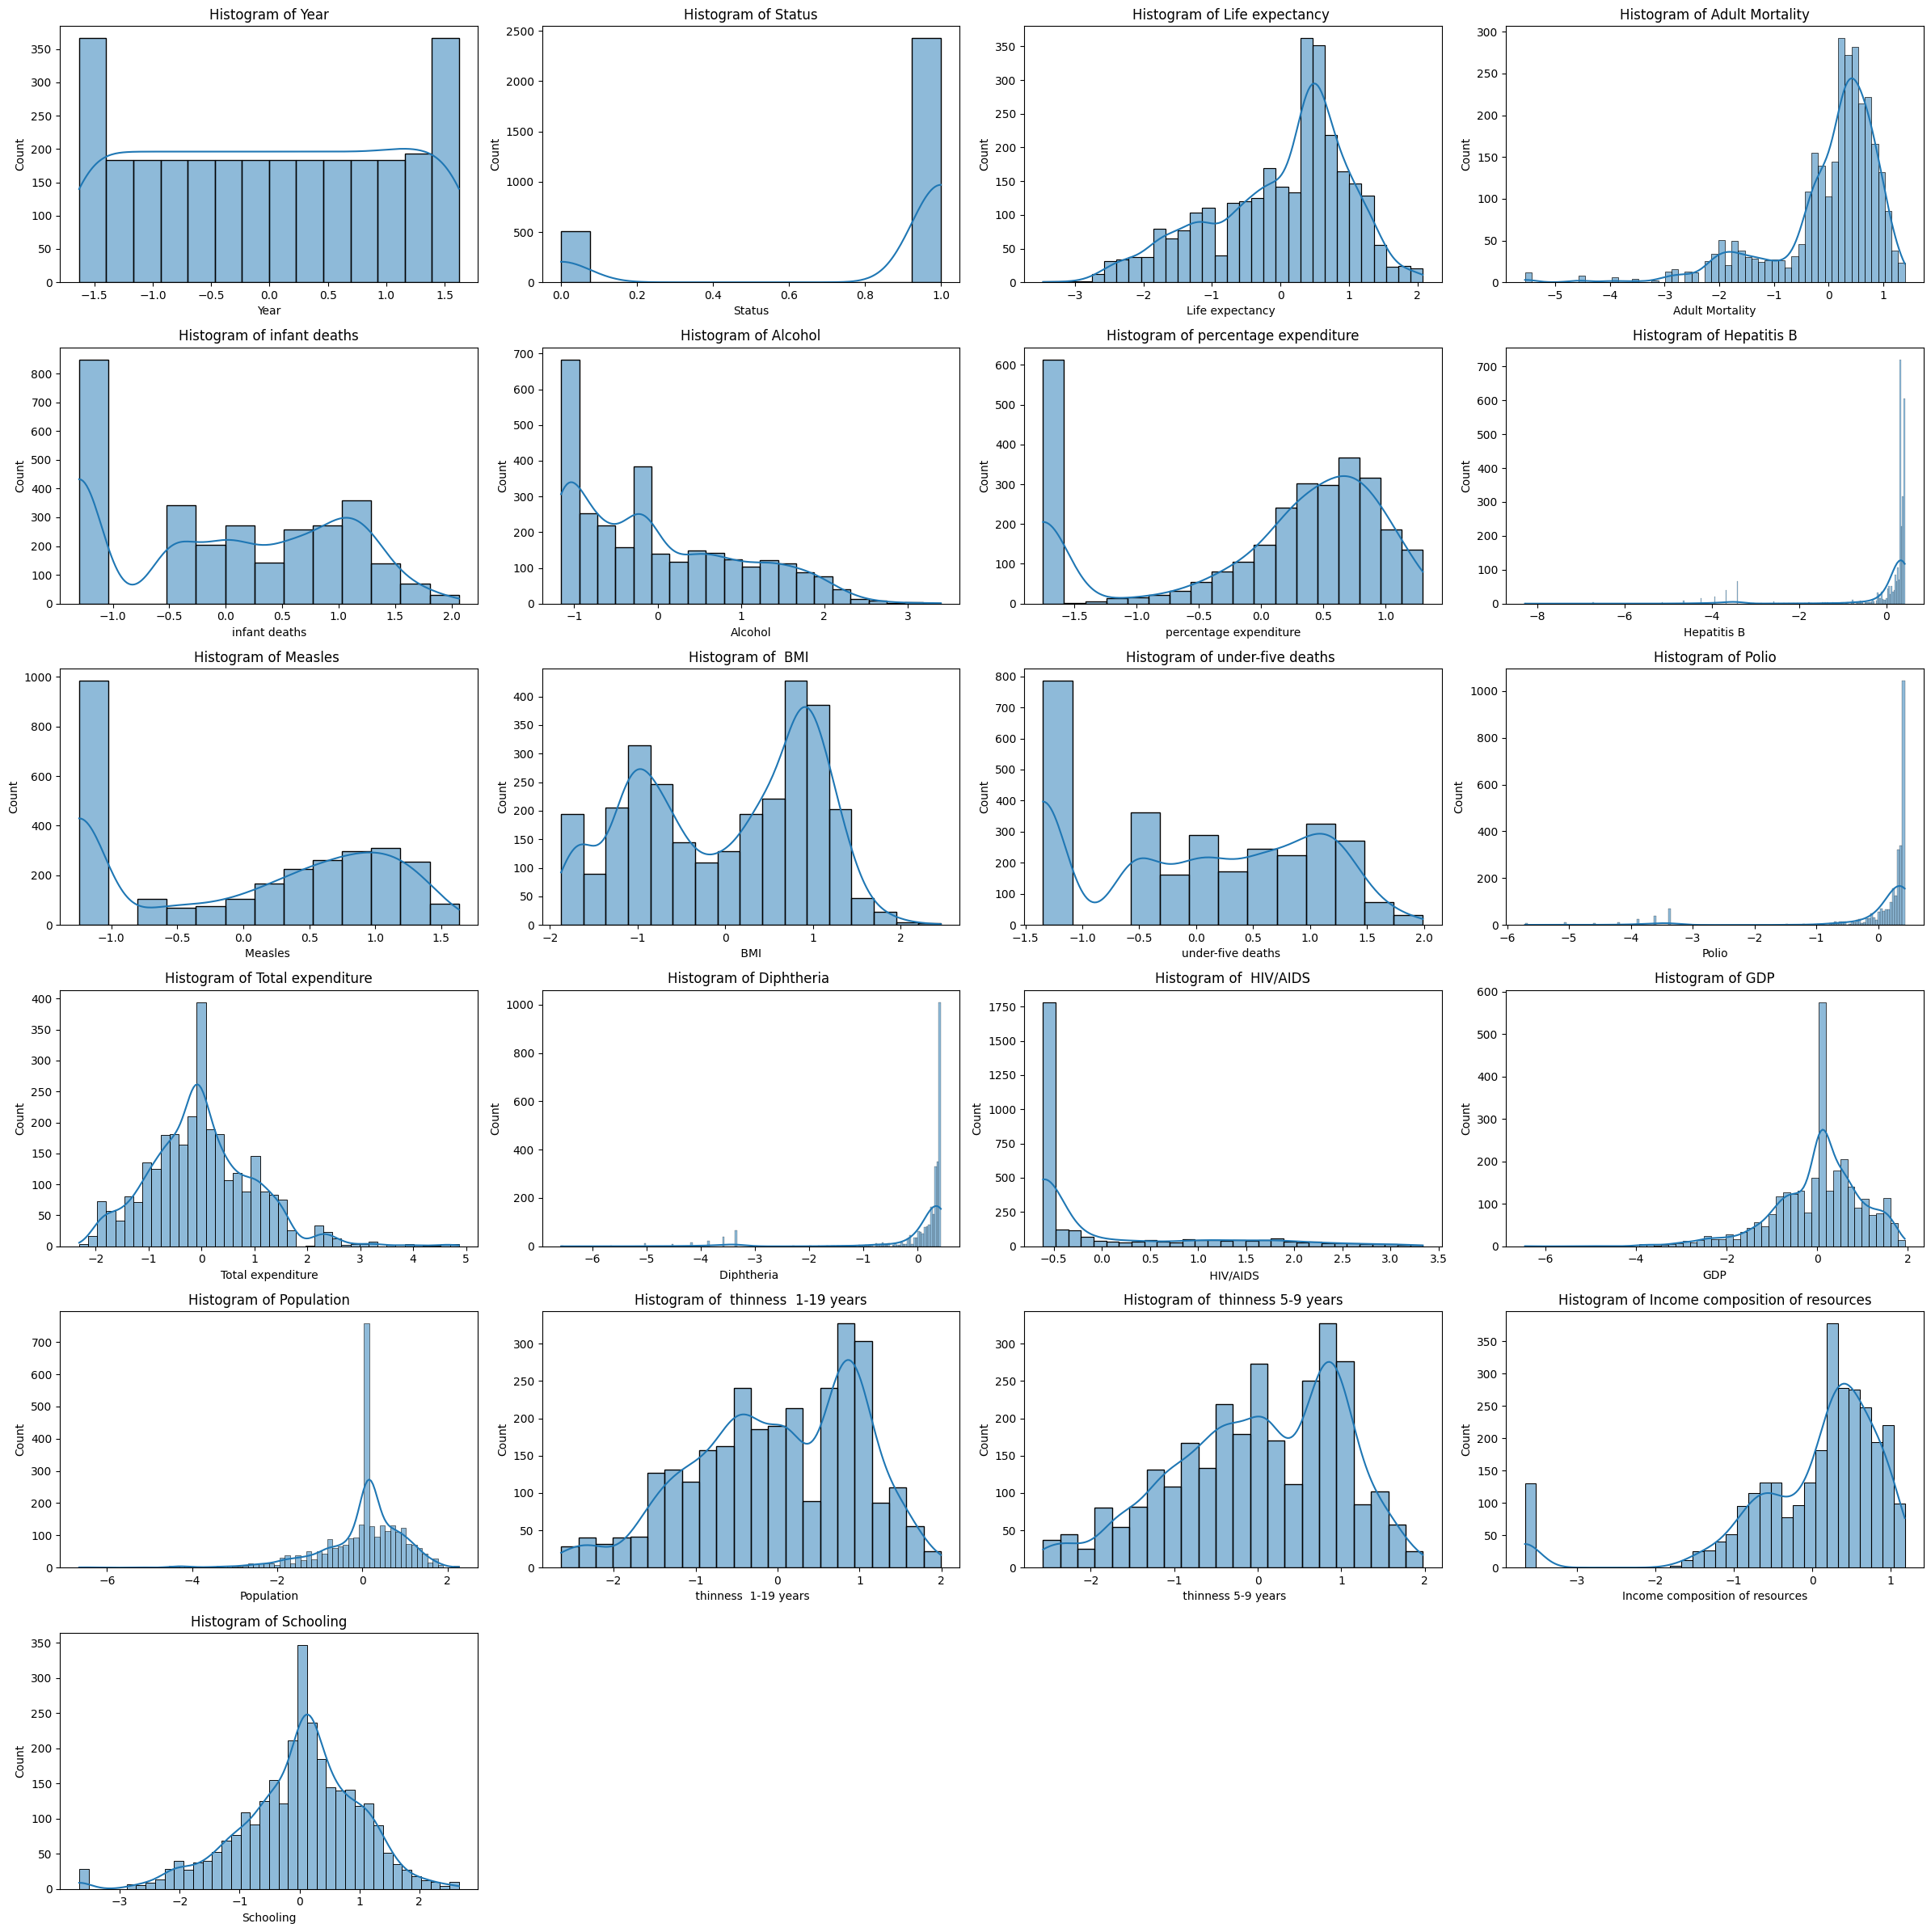

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = 4
n_rows = len(df.columns) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, n_rows*4))

axes = axes.flatten()
for i, feature in enumerate(df.columns):
    if df[feature].dtype == 'object':
        sns.countplot(x=feature, data=df, ax=axes[i])
        axes[i].set_title(f'Count Plot of {feature}')
    else:
        sns.histplot(df[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {feature}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Kita telah melakukan beberapa tahap transformasi, sehingga data yang kita miliki mulai mendekati bells curve. Berikut perbandingannya:

| Sebelum      | Sesudah|
|--------------|--------|
|![alt text](image-7.png)| ![alt text](image-8.png)|

### Korelasi antar fitur
Grafik dibawah ini menggambarkan korelasi setiap fitur numerik

<Axes: >

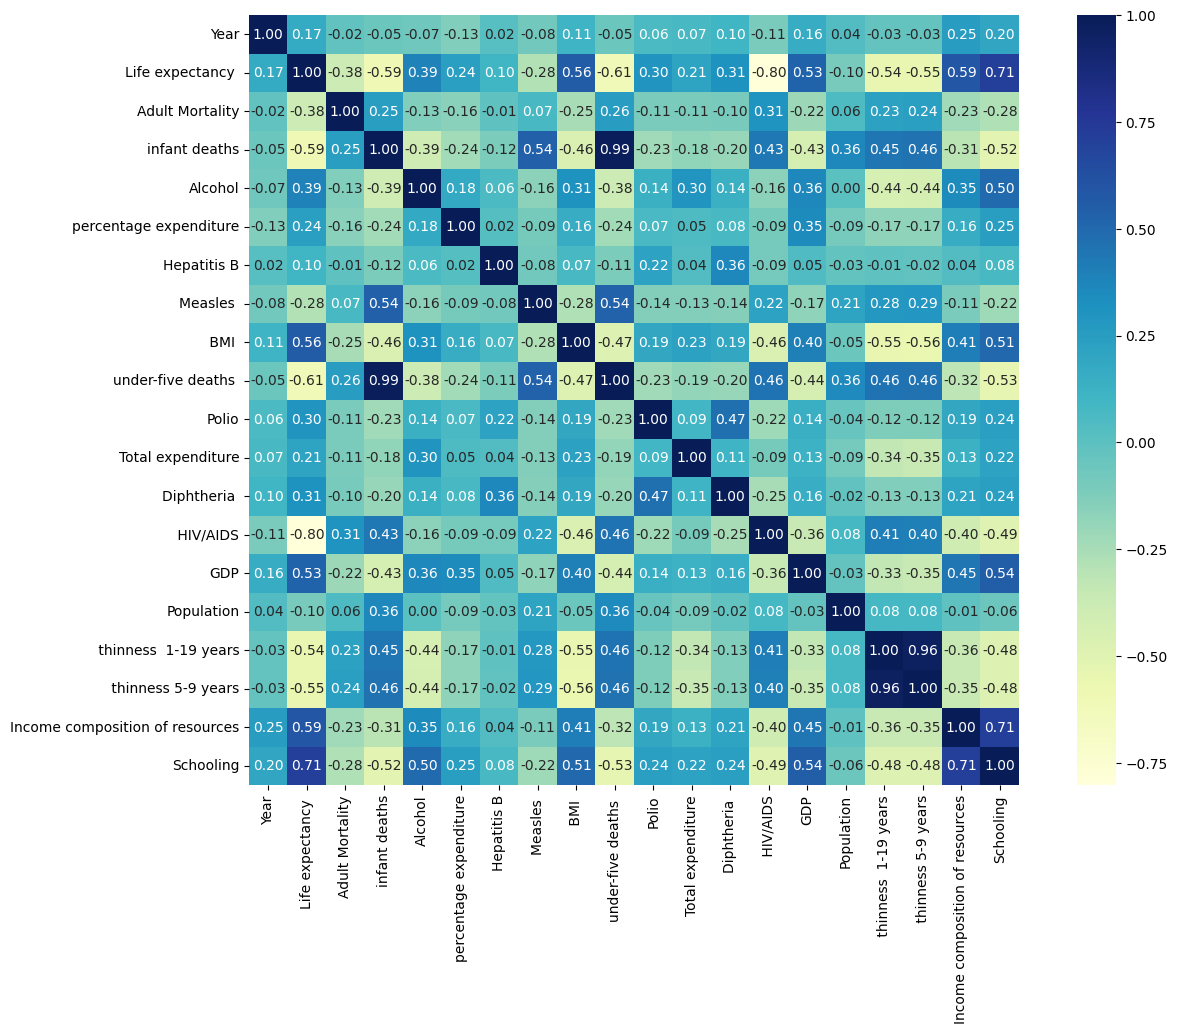

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_features].corr(), annot=True, fmt=".2f", cmap='YlGnBu', square=True)

### Histogram life expectancy

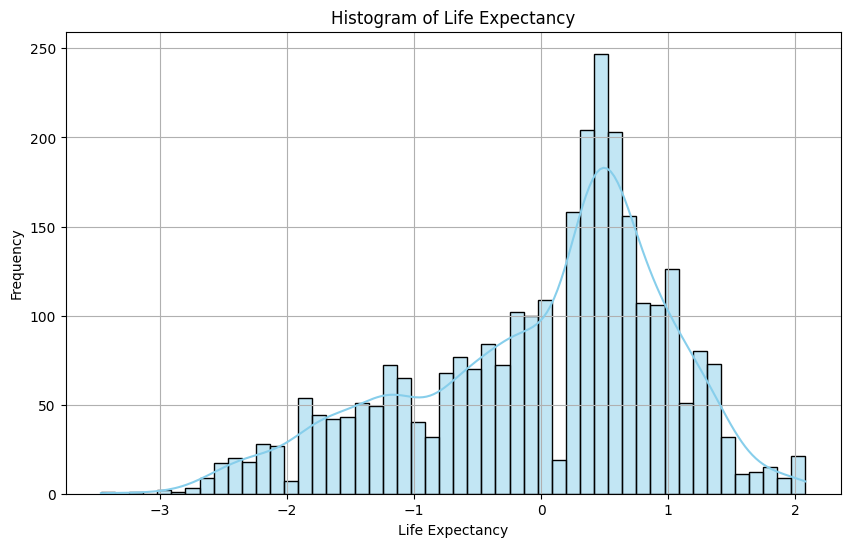

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy '], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

histogram dari harapan hidup yang telah distandardisasi Sebagian besar nilai harapan hidup berada di sekitar rata-rata (nilai 0), dengan distribusi yang sedikit condong ke kiri (negatif), menunjukkan bahwa ada lebih banyak negara dengan harapan hidup di bawah rata-rata dibandingkan yang di atas. Pola ini mengindikasikan ketimpangan dalam distribusi harapan hidup antar negara secara global.

### Life Expectancy based on Countries Status

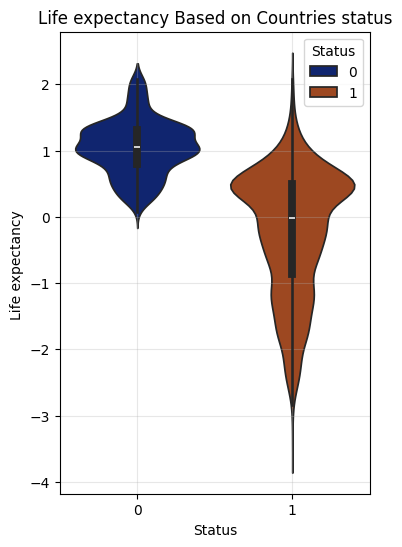

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 6))
sns.violinplot(x='Status', y='Life expectancy ', data=df, inner='box', palette='dark', hue='Status')
plt.title('Life expectancy Based on Countries status')
plt.grid(True, alpha=0.3)
plt.show()

violin plot diatas yang menunjukkan distribusi harapan hidup berdasarkan status negara, di mana status 0 dan 1 mewakili negara maju (developed) dan negara berkembang (developing). Terlihat bahwa negara dengan status 0 memiliki distribusi harapan hidup yang lebih tinggi dan merata dibandingkan status 1, yang memiliki sebaran lebih luas dan mencakup nilai harapan hidup yang sangat rendah. Artinya, negara dengan status 0 cenderung memiliki harapan hidup yang lebih baik secara konsisten.

### Korelasi fitur numerik dengan Life Expectancy

In [25]:
var_corr = df[num_features]

var_corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621762,-0.445408,0.733383,1.276514,-1.156989,0.375155,-0.139398,1.078353,-0.964715,1.247215,-4.196597,0.931485,-0.117950,-0.611962,-0.525032,1.237852,1.621390,1.595385,-0.534228,-0.585017
1,1.404986,-0.981827,0.754370,1.286041,-1.156989,0.382536,-0.204904,0.953943,-0.989810,1.257084,-0.283485,0.939818,-0.182207,-0.611962,-0.496032,-0.413702,1.635420,1.604486,-0.548070,-0.615649
2,1.188210,-0.981827,0.746584,1.295224,-1.156989,0.381551,-0.160831,0.932967,-1.014905,1.266559,-0.191220,0.918987,-0.138974,-0.611962,-0.477447,1.218882,1.644617,1.613465,-0.575899,-0.646281
3,0.971434,-1.023899,0.756943,1.308404,-1.156989,0.397057,-0.097669,1.193976,-1.040000,1.278627,-0.085269,1.081463,-0.077017,-0.611962,-0.442006,0.509486,1.653690,1.626709,-0.608615,-0.676912
4,0.754658,-1.055453,0.764598,1.316822,-1.156989,-0.309374,-0.077350,1.203647,-1.060076,1.290103,-0.065193,0.810670,-0.057085,-0.611962,-2.131376,0.433024,1.667078,1.635394,-0.651077,-0.768808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762774,-2.622638,1.394697,1.006675,-0.047657,-1.752485,-0.077350,0.422113,-0.563194,1.045575,-0.085269,0.502383,-0.117950,3.115376,-0.681589,0.929482,1.101899,1.083593,-0.880441,-0.860703
2934,-0.979550,-2.601602,1.387905,0.993417,-0.124162,-1.752485,-3.936317,1.058108,-0.583270,1.037983,-3.877958,0.248255,-0.057085,3.164388,-0.683007,0.925791,1.139578,1.129302,-0.825577,-0.768808
2935,-1.196326,-2.570047,-0.262556,0.979540,-0.029805,-1.752485,0.019242,0.877108,-0.603346,1.030169,0.030242,0.252421,0.000706,3.208728,-2.220439,-0.825121,-0.995657,-0.883888,-0.781236,-0.615649
2936,-1.413102,-2.517457,1.362541,0.979540,-0.720907,-1.752485,0.073546,0.965076,-0.623422,1.022121,0.083896,0.098278,0.073454,3.239064,-0.563758,0.918791,-0.696039,-0.609168,-0.781236,-0.676912


var_corr menampilkan nilai korelasi antar setiap fitur numerik. Selanjutnya, kita ingin melakukan analisis antara fitur numerik dengan target corr (Life expectancy) dengan tahapan seperti di bawah ini.

In [26]:
target_corr = df['Life expectancy ']

var_corr = df[num_features]
var_corr = var_corr.drop(columns=['Life expectancy '])


print(var_corr)

          Year  Adult Mortality  infant deaths   Alcohol  \
0     1.621762         0.733383       1.276514 -1.156989   
1     1.404986         0.754370       1.286041 -1.156989   
2     1.188210         0.746584       1.295224 -1.156989   
3     0.971434         0.756943       1.308404 -1.156989   
4     0.754658         0.764598       1.316822 -1.156989   
...        ...              ...            ...       ...   
2933 -0.762774         1.394697       1.006675 -0.047657   
2934 -0.979550         1.387905       0.993417 -0.124162   
2935 -1.196326        -0.262556       0.979540 -0.029805   
2936 -1.413102         1.362541       0.979540 -0.720907   
2937 -1.629878         1.343404       0.964988 -0.731107   

      percentage expenditure  Hepatitis B  Measles       BMI   \
0                   0.375155    -0.139398  1.078353 -0.964715   
1                   0.382536    -0.204904  0.953943 -0.989810   
2                   0.381551    -0.160831  0.932967 -1.014905   
3                  

In [27]:
var_corr

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621762,0.733383,1.276514,-1.156989,0.375155,-0.139398,1.078353,-0.964715,1.247215,-4.196597,0.931485,-0.117950,-0.611962,-0.525032,1.237852,1.621390,1.595385,-0.534228,-0.585017
1,1.404986,0.754370,1.286041,-1.156989,0.382536,-0.204904,0.953943,-0.989810,1.257084,-0.283485,0.939818,-0.182207,-0.611962,-0.496032,-0.413702,1.635420,1.604486,-0.548070,-0.615649
2,1.188210,0.746584,1.295224,-1.156989,0.381551,-0.160831,0.932967,-1.014905,1.266559,-0.191220,0.918987,-0.138974,-0.611962,-0.477447,1.218882,1.644617,1.613465,-0.575899,-0.646281
3,0.971434,0.756943,1.308404,-1.156989,0.397057,-0.097669,1.193976,-1.040000,1.278627,-0.085269,1.081463,-0.077017,-0.611962,-0.442006,0.509486,1.653690,1.626709,-0.608615,-0.676912
4,0.754658,0.764598,1.316822,-1.156989,-0.309374,-0.077350,1.203647,-1.060076,1.290103,-0.065193,0.810670,-0.057085,-0.611962,-2.131376,0.433024,1.667078,1.635394,-0.651077,-0.768808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762774,1.394697,1.006675,-0.047657,-1.752485,-0.077350,0.422113,-0.563194,1.045575,-0.085269,0.502383,-0.117950,3.115376,-0.681589,0.929482,1.101899,1.083593,-0.880441,-0.860703
2934,-0.979550,1.387905,0.993417,-0.124162,-1.752485,-3.936317,1.058108,-0.583270,1.037983,-3.877958,0.248255,-0.057085,3.164388,-0.683007,0.925791,1.139578,1.129302,-0.825577,-0.768808
2935,-1.196326,-0.262556,0.979540,-0.029805,-1.752485,0.019242,0.877108,-0.603346,1.030169,0.030242,0.252421,0.000706,3.208728,-2.220439,-0.825121,-0.995657,-0.883888,-0.781236,-0.615649
2936,-1.413102,1.362541,0.979540,-0.720907,-1.752485,0.073546,0.965076,-0.623422,1.022121,0.083896,0.098278,0.073454,3.239064,-0.563758,0.918791,-0.696039,-0.609168,-0.781236,-0.676912


In [28]:
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621762,1,-0.445408,0.733383,1.276514,-1.156989,0.375155,-0.139398,1.078353,-0.964715,...,-4.196597,0.931485,-0.117950,-0.611962,-0.525032,1.237852,1.621390,1.595385,-0.534228,-0.585017
1,1.404986,1,-0.981827,0.754370,1.286041,-1.156989,0.382536,-0.204904,0.953943,-0.989810,...,-0.283485,0.939818,-0.182207,-0.611962,-0.496032,-0.413702,1.635420,1.604486,-0.548070,-0.615649
2,1.188210,1,-0.981827,0.746584,1.295224,-1.156989,0.381551,-0.160831,0.932967,-1.014905,...,-0.191220,0.918987,-0.138974,-0.611962,-0.477447,1.218882,1.644617,1.613465,-0.575899,-0.646281
3,0.971434,1,-1.023899,0.756943,1.308404,-1.156989,0.397057,-0.097669,1.193976,-1.040000,...,-0.085269,1.081463,-0.077017,-0.611962,-0.442006,0.509486,1.653690,1.626709,-0.608615,-0.676912
4,0.754658,1,-1.055453,0.764598,1.316822,-1.156989,-0.309374,-0.077350,1.203647,-1.060076,...,-0.065193,0.810670,-0.057085,-0.611962,-2.131376,0.433024,1.667078,1.635394,-0.651077,-0.768808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762774,1,-2.622638,1.394697,1.006675,-0.047657,-1.752485,-0.077350,0.422113,-0.563194,...,-0.085269,0.502383,-0.117950,3.115376,-0.681589,0.929482,1.101899,1.083593,-0.880441,-0.860703
2934,-0.979550,1,-2.601602,1.387905,0.993417,-0.124162,-1.752485,-3.936317,1.058108,-0.583270,...,-3.877958,0.248255,-0.057085,3.164388,-0.683007,0.925791,1.139578,1.129302,-0.825577,-0.768808
2935,-1.196326,1,-2.570047,-0.262556,0.979540,-0.029805,-1.752485,0.019242,0.877108,-0.603346,...,0.030242,0.252421,0.000706,3.208728,-2.220439,-0.825121,-0.995657,-0.883888,-0.781236,-0.615649
2936,-1.413102,1,-2.517457,1.362541,0.979540,-0.720907,-1.752485,0.073546,0.965076,-0.623422,...,0.083896,0.098278,0.073454,3.239064,-0.563758,0.918791,-0.696039,-0.609168,-0.781236,-0.676912


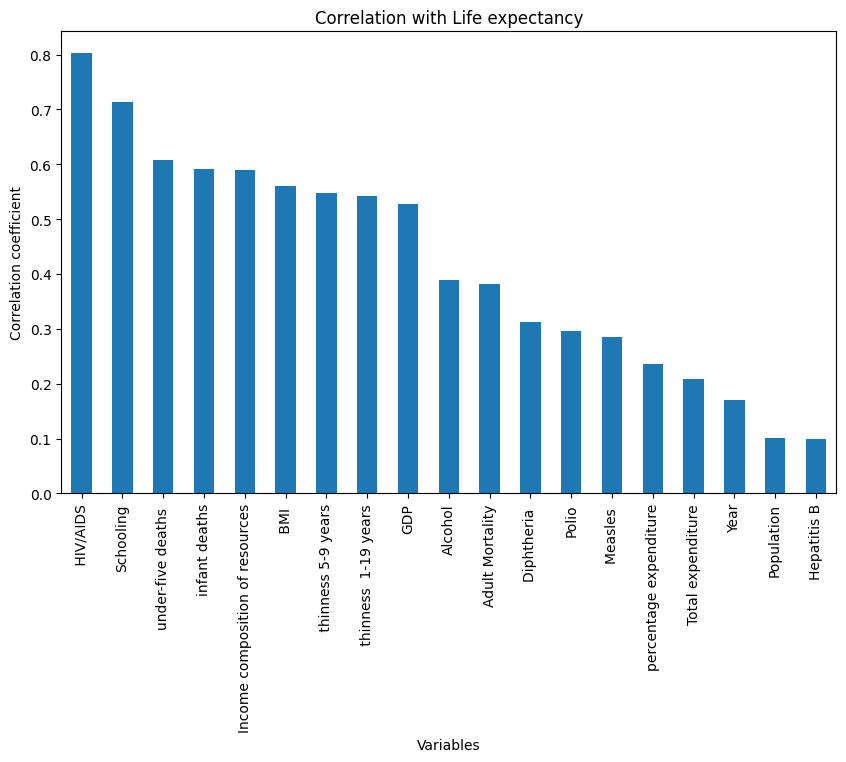

In [29]:
correlation = var_corr.corrwith(target_corr)


correlation_sorted = correlation.abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))

correlation_sorted.plot(kind='bar')
plt.title(f'Correlation with Life expectancy')
plt.xlabel('Variables')
plt.ylabel('Correlation coefficient')
plt.show()

Berdasarkan bar plot di atas, dapat dilihat 5 fitur yang paling berpengaruh dengan life expectancy adalah:
 - HIV/AIDS
 - Schooling
 - under-fixe deaths
 - Infant deaths
 - Income composition of resources

### Korelasi fitur kategorikal dengan Life Expectancy

Setelah menganalisis korelasi antara fitur numerik, berikutnya proses analisis korelasi dilakukan dengan fitur kategorikal.

Fitur categorical yang kita gunakan adalah Status (Developed dan Developing)


In [32]:
df[['Life expectancy ', 'Status']].corr()


,Life expectancy,Status
Life expectancy,1.000000,-0.481415
Status,-0.481415,1.000000


Dapat dilihat korelasi fitur kategorikal dan fitur target adalah -0.48141473517841626.

### Feature selection

Sebelum membangun model, kita memilih fitur penting supaya model dapat berfokus pada fitur yang benar-benar berpengaruh [Why Feature Selection is Critical for Machine Learning].

In [33]:
correlation_matrix = df.corr()

In [34]:
print(correlation_matrix)

                                     Year    Status  Life expectancy   \
Year                             1.000000  0.001864          0.170819   
Status                           0.001864  1.000000         -0.481415   
Life expectancy                  0.170819 -0.481415          1.000000   
Adult Mortality                 -0.015915  0.229141         -0.382009   
infant deaths                   -0.051117  0.390917         -0.590935   
Alcohol                         -0.069147 -0.579662          0.388918   
percentage expenditure          -0.129510 -0.187293          0.235422   
Hepatitis B                      0.016584 -0.082167          0.099945   
Measles                         -0.083794  0.014253         -0.284467   
 BMI                             0.108327 -0.310873          0.560453   
under-five deaths               -0.049216  0.389175         -0.607908   
Polio                            0.058463 -0.147306          0.296208   
Total expenditure                0.074552 -0.290431

In [35]:
important_features = []

for feature in correlation_matrix.columns:
    if abs(correlation_matrix['Life expectancy '][feature]) > 0.5 and feature != 'Life expectancy ':
        important_features.append(feature)
        print(f"Feature '{feature}' has a strong correlation with 'Life expectancy ': {correlation_matrix['Life expectancy '][feature]}\n")
    else:
        print(f"Feature '{feature}' does not have a strong correlation with 'Life expectancy ': {correlation_matrix['Life expectancy '][feature]}\n")

Feature 'Year' does not have a strong correlation with 'Life expectancy ': 0.1708192726622876

Feature 'Status' does not have a strong correlation with 'Life expectancy ': -0.48141473517841626

Feature 'Life expectancy ' does not have a strong correlation with 'Life expectancy ': 1.0

Feature 'Adult Mortality' does not have a strong correlation with 'Life expectancy ': -0.3820090257905637

Feature 'infant deaths' has a strong correlation with 'Life expectancy ': -0.5909347433461215

Feature 'Alcohol' does not have a strong correlation with 'Life expectancy ': 0.38891753775418875

Feature 'percentage expenditure' does not have a strong correlation with 'Life expectancy ': 0.2354216430114993

Feature 'Hepatitis B' does not have a strong correlation with 'Life expectancy ': 0.09994482693662202

Feature 'Measles ' does not have a strong correlation with 'Life expectancy ': -0.28446745510099897

Feature ' BMI ' has a strong correlation with 'Life expectancy ': 0.5604529616577211

Feature 'u

In [36]:
print("Important features:")
print(important_features)

Important features:
['infant deaths', ' BMI ', 'under-five deaths ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


Importan features yang akan kita gunakan dalam pembangunan model adalah: 
['infant deaths', ' BMI ', 'under-five deaths ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

In [37]:
df_important = df[important_features + ['Life expectancy ']]

In [38]:
df_important

,infant deaths,BMI,under-five deaths,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,1.276514,-0.964715,1.247215,-0.611962,-0.525032,1.621390,1.595385,-0.534228,-0.585017,-0.445408
1,1.286041,-0.989810,1.257084,-0.611962,-0.496032,1.635420,1.604486,-0.548070,-0.615649,-0.981827
2,1.295224,-1.014905,1.266559,-0.611962,-0.477447,1.644617,1.613465,-0.575899,-0.646281,-0.981827
3,1.308404,-1.040000,1.278627,-0.611962,-0.442006,1.653690,1.626709,-0.608615,-0.676912,-1.023899
4,1.316822,-1.060076,1.290103,-0.611962,-2.131376,1.667078,1.635394,-0.651077,-0.768808,-1.055453
...,...,...,...,...,...,...,...,...,...,...
2933,1.006675,-0.563194,1.045575,3.115376,-0.681589,1.101899,1.083593,-0.880441,-0.860703,-2.622638
2934,0.993417,-0.583270,1.037983,3.164388,-0.683007,1.139578,1.129302,-0.825577,-0.768808,-2.601602
2935,0.979540,-0.603346,1.030169,3.208728,-2.220439,-0.995657,-0.883888,-0.781236,-0.615649,-2.570047
2936,0.979540,-0.623422,1.022121,3.239064,-0.563758,-0.696039,-0.609168,-0.781236,-0.676912,-2.517457


variabel df_important merupakan variabel yang menyimpan important feature dengan target variabel.

### Data splitting
Pertama, kita perlu membagi dua dataset yang kita miliki menjadi data train dan data test.
Langkah-langkah untuk melakukan data splitting adalah:
 - Inisiasi variabel:
    - X : variabel-variabel fitur selain target
    - y : variabel target
 - Memanggil fungsi train test split, hasil data splitting akan disimpan pada variabel : X_train, X_test, y_train, y_test
 - Parameter yang digunakan yaitu:
   - X, y : data yang ingin dibagi
   - test_size : ukuran test size yang digunakan, pada kasus ini menggunakan 0.2 (80:20)
   - random_state=42 : memastikan konsistensi data yang dihasilkan meskipu proses data splitting dilakukan secara berulang.

In [39]:
from sklearn.model_selection import train_test_split

X = df_important.drop(columns='Life expectancy ')
y = df_important['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:

print("Jumlah data: ",len(X))

print("Jumlah data latih: ",len(X_train))

print("Jumlah data test: ",len(X_test))

Jumlah data:  2938
Jumlah data latih:  2350
Jumlah data test:  588


## Modeling
Setelah mempersiapkan dataset, kita dapat mulai membangun model. Ada beberapa tahapan yang perlu dilakukan, seperti yang akan dijelaskan dibawah ini.

Setelah melakukan data splitting, kemudian kita melakukan pengecekan jumlah data, seperti dibawah ini:

### Model initialization
Langkah berikutnya adalah inisiasi model.

In [41]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lars
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "LARS": Lars(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Ridge Regression": Ridge()
}


Penjelasan model yang digunakan adalah:

| Nama Model    | Kelebihan & Kekurangan     | Referensi  |
|---------------|---------------|-------------|
| Linear Regression  | Linear Regression menawarkan kesederhanaan dan interpretabilitas tinggi, tetapi terbatas hanya untuk hubungan linier dan sensitif terhadap outlier. | [Linear Regression in Machine learning]|
| LARS    | Least Angle Regression (LARS) unggul dalam dataset berdimensi tinggi dan efektif untuk seleksi fitur, namun lebih kompleks untuk diinterpretasi dan kurang populer. | [Least Angle Regression (LARS)]|
|Gradient Boosting  | Gradient Boosting memberikan performa sangat tinggi untuk hubungan kompleks, tetapi membutuhkan tuning parameter yang ekstensif dan komputasi berat.  | [Gradient Boosting] |
| Random Forest | Random Forest menawarkan keseimbangan yang baik dengan performa solid tanpa banyak penyesuaian dan ketahanan terhadap overfitting, meskipun kurang interpretable. | [Random Forest Algorithm in Machine Learning] |
| Ridge Regression  | Ridge Regression efektif mengatasi multikolinearitas melalui regularisasi L2, tetapi tidak melakukan seleksi fitur dan masih terbatas pada hubungan linier. | [Ridge Regression] |

Meskipun kita telah mengetahui karakteristik dari masing-masing algoritma, kita perlu mengujinya terlebih dahulu, karena dataset itu unik, sehingga tidak ada algoritma yang sejatinya langsung sesuai dengan algoritma tertentu. Untuk itu, kita akan melakukan pelatihan dan evaluasi untuk memilih algoritma.



### Evaluation

Untuk melakukan tahap evaluasi, berikut ini langkah-langkah yang dapat dijalankan:

### Membuat dataframe 
EvaluasiDataframe mencakup nama model, serta metrik yang digunakan. Pada kasus ini, kita menggunakan metrik MSE, RMSE, R2.

In [42]:
df_results = pd.DataFrame(columns=["Model", "MSE", "RMSE", "R2"])

Dilansir dari [Metrics for Linear Regression Effectiveness: R-squared, MSE and RSE] penjelasan dari masing-masing metrik adalah sebagai berikut:

| Metrik  | Deskripsi       | Cara kerja      | Formula |
|---------|-----------------|-----------------|--------|
| Mean Squared Error (MSE)  | MSE adalah metrik yang mengukur rata-rata kuadrat dari error (selisih antara nilai prediksi dan nilai aktual). Semakin kecil nilai MSE, semakin baik model prediksi.  | MSE bekerja dengan menghitung selisih antara nilai prediksi dan nilai aktual, mengkuadratkan selisih tersebut (untuk menghilangkan nilai negatif), kemudian menghitung nilai rata-ratanya. Pengkuadratan membuat MSE lebih sensitif terhadap outlier. | $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$|
| Root Mean Squared Error (RMSE)  | RMSE adalah akar kuadrat dari MSE, digunakan untuk mendapatkan error dalam unit yang sama dengan variabel yang diprediksi. RMSE lebih mudah diinterpretasi karena berada dalam skala data asli. | RMSE bekerja dengan menghitung MSE terlebih dahulu, kemudian mengambil akar kuadratnya. Seperti MSE, RMSE juga sensitif terhadap outlier dan nilai yang lebih besar memberikan penalti yang lebih besar.  | $RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$ |
|Coefficient of Determination (R²)  | R² mengukur proporsi variasi dalam variabel dependen yang dapat dijelaskan oleh variabel independen dalam model. Nilainya berkisar antara 0 hingga 1, dimana nilai yang lebih tinggi menunjukkan model yang lebih baik. | R² bekerja dengan membandingkan error model dengan variasi total data. R² mengukur seberapa baik model menangkap pola dalam data dibandingkan dengan hanya menggunakan nilai rata-rata sebagai prediksi.  | $R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$


Setelah menyiapkan dataframe dan metrik evaluasi, selanjutkan lakukan traininng dan evaluasi pada model yang telah dilakukan inisiasi.

In [43]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = model.score(X_test, y_test)
    
    results.append({
        "Model": model_name,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

df_results = pd.DataFrame(results)

In [45]:
print(df_results)

               Model       MSE      RMSE        R2
0  Linear Regression  0.170528  0.412950  0.822142
1               LARS  0.170528  0.412950  0.822142
2  Gradient Boosting  0.081421  0.285343  0.915080
3      Random Forest  0.037250  0.193003  0.961149
4   Ridge Regression  0.170517  0.412937  0.822153


Dari hasil evaluasi tersebut, algoritma menunjukkan keunggulan dengan MSE dan RMSE terendah, serta R2 tertinggi. Sehingga algoritma yang dipilih adalah **random forest.**

### Visualisasi prediksi model

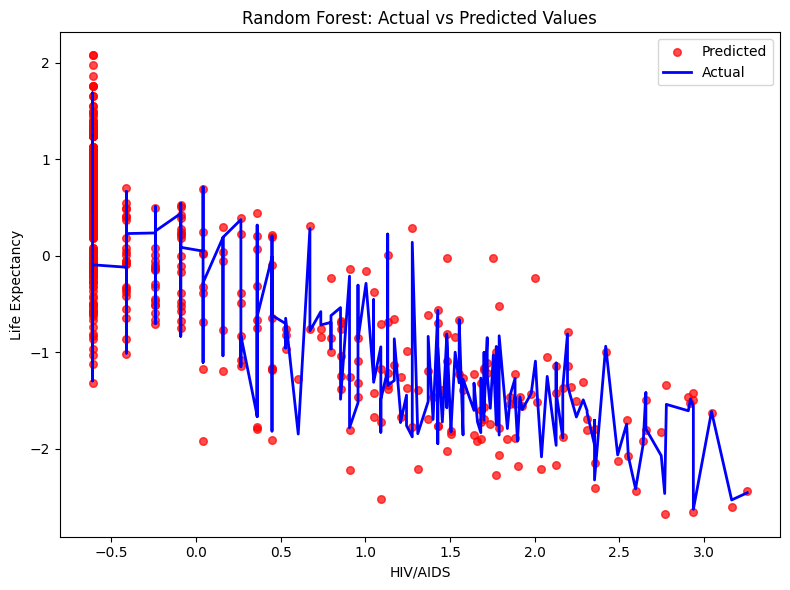

In [46]:
rf_model = models['Random Forest'].fit(X_train, y_train)

hiv_column_name = X_test.columns[3] 

sorted_indices = X_test[hiv_column_name].sort_values().index
X_test_sorted = X_test.loc[sorted_indices]
y_test_sorted = y_test.loc[sorted_indices]

y_pred_sorted = rf_model.predict(X_test_sorted)

plt.figure(figsize=(8, 6))
plt.scatter(X_test[hiv_column_name], y_test, color='red', alpha=0.7, s=30)
plt.plot(X_test_sorted[hiv_column_name], y_pred_sorted, color='blue', linewidth=2)
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')
plt.title('Random Forest: Actual vs Predicted Values')
plt.legend(['Predicted', 'Actual'])
plt.tight_layout()
plt.show()

Algoritma random forest telah melakukan prediksi dengan baik.

### Hyperparameter tuning

Meskipun hasil telah memuaskan, kita belum melakukan tuning apapun terhadap model kita. Karena itu, kita dapat melakukan penyesuaian model melalui hyperparameter tuning.Metode yang digunakan adalah Bayesian search optimization. 

In [47]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

search_space = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(5, 30),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2', None]),
    'bootstrap': Categorical([True, False])
}

rf_model = RandomForestRegressor(random_state=42)

bayes_search = BayesSearchCV(
    estimator=rf_model,
    search_spaces=search_space,
    n_iter=50,  
    cv=5,       
    n_jobs=-1,  
    verbose=1,
    scoring='neg_mean_squared_error',
    random_state=42
)

bayes_search.fit(X_train, y_train)

best_params = bayes_search.best_params_
best_rf = bayes_search.best_estimator_

y_pred = best_rf.predict(X_test)
tuned_mse = mean_squared_error(y_test, y_pred)
tuned_rmse = np.sqrt(tuned_mse)
tuned_r2 = r2_score(y_test, y_pred)

print("Best hyperparameters:", best_params)
print("\nOptimized Random Forest Performance:")
print(f"MSE: {tuned_mse:.6f}")
print(f"RMSE: {tuned_rmse:.6f}")
print(f"R²: {tuned_r2:.6f}")
print("\nImprovement:")
print(f"Original R²: {0.959501:.6f}")
print(f"Tuned R²: {tuned_r2:.6f}")
print(f"R² Improvement: {tuned_r2 - 0.959501:.6f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/home/nadia/Documents/non-kuliah/CODINGCAMP/MachineLearningPlayGround/MachineLearningTerapan/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.True_, np.int64(20), np.str_('sqrt'), np.int64(1), np.int64(2), np.int64(50)] before, using random point [True, np.int64(26), 'log2', np.int64(5), np.int64(12), np.int64(173)]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/home/nadia/Documents/non-kuliah/CODINGCAMP/MachineLearningPlayGround/MachineLearningTerapan/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.True_, np.int64(21), np.str_('log2'), np.int64(1), np.int64(2), np.int64(300)] before, using random point [False, np.int64(17), 'log2', np.int64(7), np.int64(13), np.int64(199)]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/nadia/Documents/non-kuliah/CODINGCAMP/MachineLearningPlayGround/MachineLearningTerapan/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.True_, np.int64(21), np.str_('log2'), np.int64(1), np.int64(2), np.int64(300)] before, using random point [True, np.int64(7), 'sqrt', np.int64(6), np.int64(11), np.int64(201)]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: OrderedDict({'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 77})

Optimized Random Forest Performance:
MSE: 0.029405
RMSE: 0.171480
R²: 0.969331

Improvement:
Original R²: 0.959501
Tuned R²: 0.969331
R² Improvement: 0.009830


Outputnya adalah sebagai berikut:
Best hyperparameters: OrderedDict({'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 77})

Optimized Random Forest Performance:
MSE: 0.029405
RMSE: 0.171480
R²: 0.969331

Improvement:
Original R²: 0.959501
Tuned R²: 0.969331
R² Improvement: 0.009830

### Visualisasi tuned model

Berikut ini visualisasi prediksi dengan tuned model. Tidak terlihat perbedaan yang signifikan karena evaluasi sebelumnya telah memuaskan.

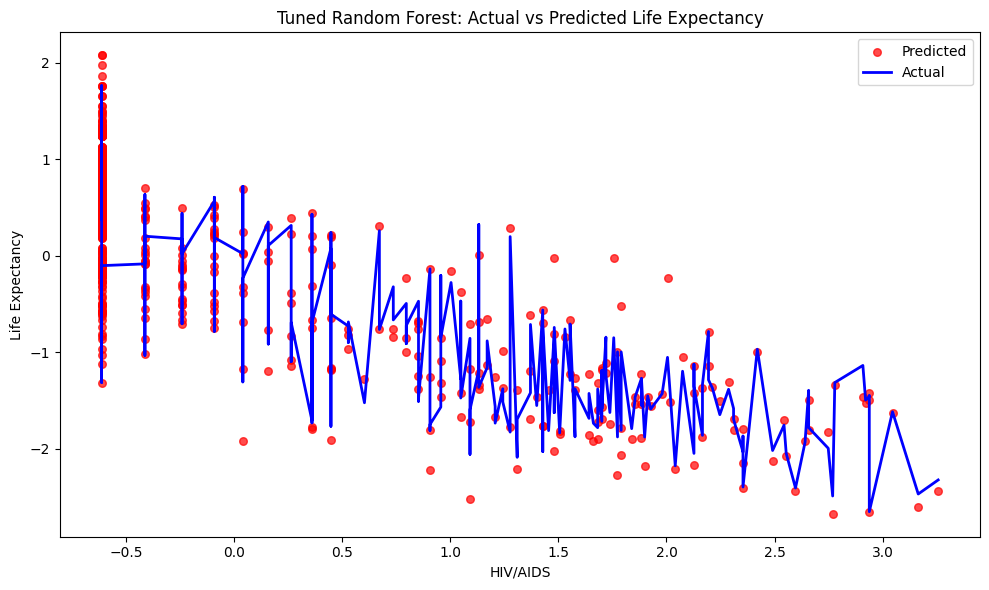

In [48]:
if isinstance(X_test, pd.DataFrame):
    hiv_column = X_test.iloc[:, 3]
    sorted_indices = hiv_column.sort_values().index
    X_test_sorted = X_test.loc[sorted_indices]
    y_test_sorted = y_test.loc[sorted_indices]
else:
    sorted_indices = np.argsort(X_test[:, 3])
    X_test_sorted = X_test[sorted_indices]
    y_test_sorted = y_test[sorted_indices]

y_pred_sorted = best_rf.predict(X_test_sorted)

plt.figure(figsize=(10, 6))
if isinstance(X_test, pd.DataFrame):
    plt.scatter(hiv_column, y_test, color='red', alpha=0.7, s=30)
    plt.plot(X_test_sorted.iloc[:, 3], y_pred_sorted, color='blue', linewidth=2)
else:
    plt.scatter(X_test[:, 3], y_test, color='red', alpha=0.7, s=30)
    plt.plot(X_test_sorted[:, 3], y_pred_sorted, color='blue', linewidth=2)

plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')
plt.title('Tuned Random Forest: Actual vs Predicted Life Expectancy')
plt.legend(['Predicted', 'Actual'])
plt.tight_layout()
plt.show()

### Evaluasi tuned model

In [49]:
import pandas as pd

original_rf = {
    "Model": "Random Forest (Original)",
    "MSE": 0.038830,
    "RMSE": 0.197053,
    "R2": 0.959501
}

tuned_rf = {
    "Model": "Random Forest (Tuned)",
    "MSE": 0.029405,
    "RMSE": 0.171480,
    "R2": 0.969331
}

rf_comparison = pd.DataFrame([original_rf, tuned_rf])

pd.options.display.float_format = '{:.6f}'.format

print("Random Forest Model Comparison:")
print(rf_comparison)

Random Forest Model Comparison:
                      Model      MSE     RMSE       R2
0  Random Forest (Original) 0.038830 0.197053 0.959501
1     Random Forest (Tuned) 0.029405 0.171480 0.969331


Dataframe diatas menampilkan perbandingan evaluasi model sebelum dan sesudah dilakukan proses tuning dengan metrik yang telah ditentukan.

Tuned model berhasil menurunkan MSE dan RMSE, serta meningkatkan R2.


In [50]:
mse_improvement = (original_rf["MSE"] - tuned_rf["MSE"]) / original_rf["MSE"] * 100
rmse_improvement = (original_rf["RMSE"] - tuned_rf["RMSE"]) / original_rf["RMSE"] * 100
r2_improvement = (tuned_rf["R2"] - original_rf["R2"]) / original_rf["R2"] * 100

print("\nImprovement Metrics:")
print(f"MSE: Reduced by {mse_improvement:.2f}%")
print(f"RMSE: Reduced by {rmse_improvement:.2f}%")
print(f"R2: Increased by {r2_improvement:.2f}%")

print("\nOptimal Hyperparameters:")
print("n_estimators: 77")
print("max_depth: 20")
print("min_samples_split: 2")
print("min_samples_leaf: 1")
print("max_features: 'sqrt'")
print("bootstrap: False")


Improvement Metrics:
MSE: Reduced by 24.27%
RMSE: Reduced by 12.98%
R2: Increased by 1.02%

Optimal Hyperparameters:
n_estimators: 77
max_depth: 20
min_samples_split: 2
min_samples_leaf: 1
max_features: 'sqrt'
bootstrap: False


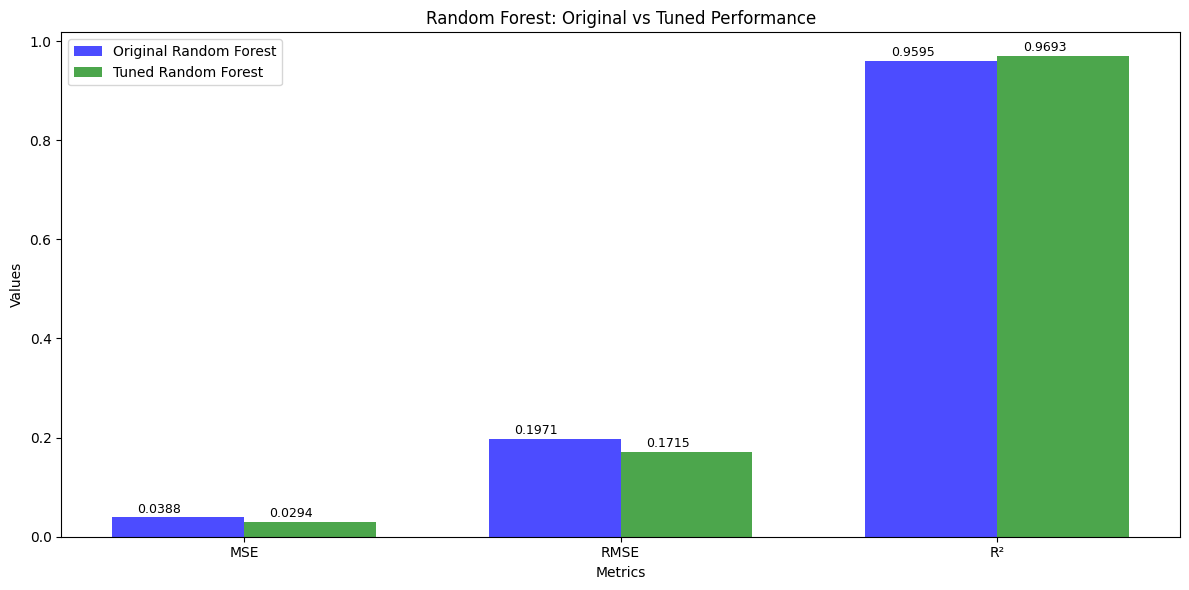

In [51]:
plt.figure(figsize=(12, 6))

bar_width = 0.35
r1 = np.arange(3)
r2 = [x + bar_width for x in r1]

metrics = ["MSE", "RMSE", "R²"]
original_values = [original_rf["MSE"], original_rf["RMSE"], original_rf["R2"]]
tuned_values = [tuned_rf["MSE"], tuned_rf["RMSE"], tuned_rf["R2"]]

plt.bar(r1, original_values, width=bar_width, color='blue', alpha=0.7, label='Original Random Forest')
plt.bar(r2, tuned_values, width=bar_width, color='green', alpha=0.7, label='Tuned Random Forest')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Random Forest: Original vs Tuned Performance')
plt.xticks([r + bar_width/2 for r in range(3)], metrics)
plt.legend()

for i, v in enumerate(original_values):
    plt.text(i - 0.05, v + 0.01, f"{v:.4f}", ha='center', fontsize=9)
    
for i, v in enumerate(tuned_values):
    plt.text(i + bar_width - 0.05, v + 0.01, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

Grafik diatas menampilkan tuned model berhasil menurunkan MSE dan RMSE, serta meningkatkan R2.


[//]:#

[Sejawat]: <https://sejawat.co.id/article/detail/life-expectancy-memperpanjang-harapan-rentang-hidup-1680701940>

[Erupean Commission]: <https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Life_expectancy>

[Determinants in Predicting Life Expectancy Using Machine Learning]: <https://doi.org/10.23947/2687-1653-2022-22-4-373-383>

[Life Expectancy (WHO)]: <https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who>

[Filling missing values with Mean and Median]: <https://tahera-firdose.medium.com/filling-missing-values-with-mean-and-median-76635d55c1bc>

[When should I remove an outlier from my dataset?]: <https://www.scribbr.com/frequently-asked-questions/when-to-remove-an-outlier/>

[Log Transformation: Purpose and Interpretation]: <https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9>

[Normalization vs Standardization]: <https://www.geeksforgeeks.org/normalization-vs-standardization/>

[Why Feature Selection is Critical for Machine Learning]: <https://ujangriswanto08.medium.com/why-feature-selection-is-critical-for-machine-learning-3913fffd62c0>

[ML | Handling Missing Values]: <https://www.geeksforgeeks.org/ml-handling-missing-values/>

[Label Encoding in Python]: <https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/>

[Linear Regression in Machine learning]: <https://www.geeksforgeeks.org/ml-linear-regression/>

[Least Angle Regression (LARS)]: <https://www.geeksforgeeks.org/least-angle-regression-lars/>

[Gradient Boosting]: <https://www.geeksforgeeks.org/ml-gradient-boosting/>

[Random Forest Algorithm in Machine Learning]: <https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/>

[Ridge Regression]: <https://www.geeksforgeeks.org/what-is-ridge-regression/>

[Metrics for Linear Regression Effectiveness: R-squared, MSE and RSE]: <https://learn.saylor.org/mod/page/view.php?id=80811>